<a href="https://colab.research.google.com/github/sanikanarmitwar/MusicGenreClassification/blob/main/musicgenreIMAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import os
from zipfile import ZipFile
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
from google.colab import files
uploaded = files.upload()

Saving lessimages_original.zip to lessimages_original (2).zip


In [36]:
# extracts the data from zip file and stores in directory extract_path
def extract_zip(zip_path, extract_path):
    with ZipFile(zip_path, 'r') as zip_ref: #opens zip file in read mode
        zip_ref.extractall(extract_path)

def display_images(folder_path):
    exts = ['.png']

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            directory_name = root.split('/')[-1]
            file_path = os.path.join(root, file)    #root stores current directory being traversed while file stores file name
            if any(file.lower().endswith(ext) for ext in exts):  # checking extension of file
                img = cv2.imread(file_path)
                # cv2_imshow(img)
# store zip file path in zipfile
file = "lessimages_original.zip"
extfolder = "extracted_folder"

# extract the contents of the zip file
extract_zip(file, extfolder)

# display images in the extracted folder
display_images(extfolder)

[202, 212, 199, 214, 184, 214, 187, 212, 211, 199, 202, 211, 212, 202, 206, 212, 211, 212, 212, 211, 212, 217, 214, 211, 212, 212, 214, 211, 212, 214, 214, 212, 212, 212, 212, 204, 212, 212, 212, 212, 212, 214, 209, 204, 190, 212, 189, 212, 212, 184, 187, 212, 212, 153, 201, 214, 212, 212, 209, 212, 209, 214, 216, 214, 212, 214, 211, 212, 211, 211, 212, 212, 214, 192, 212, 212, 212, 211, 211, 214, 207, 214, 212, 212, 214, 209, 212, 214, 214, 212, 212, 212, 212, 211, 212, 206, 212, 214, 212, 207, 211, 211, 211, 204, 209, 209, 209, 209, 214, 206]
110
(288, 432)


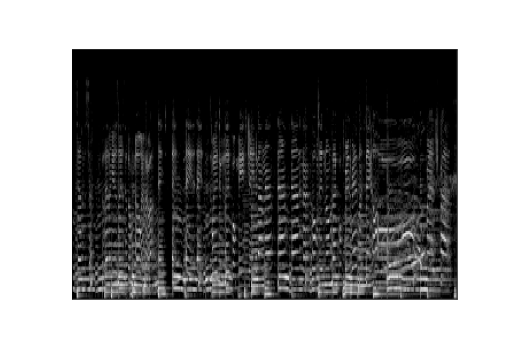

In [37]:
X = []
y = []
exts = ['.png']
im = []
# Assuming extfolder is defined somewhere in your code
for root, dirs, files in os.walk(extfolder):
    for file in files:
        label = root.split('/')[-1]
        file_path = os.path.join(root, file)    # root stores current directory being traversed while file stores file name
        if any(file.lower().endswith(ext) for ext in exts):  # checking extension of file
            img = cv2.imread(file_path, 0)

            if img is None:
                print("Error loading image:", file_path)
                continue

            im.append(img)
            mean_intensity = img.mean(axis = 1)
            mean_intensity = mean_intensity[mean_intensity != 255]

            top_indices = np.argsort(mean_intensity)[-5:]
            max_intensity_index = np.argmax(mean_intensity)
            X.append(max_intensity_index)
            y.append(label)

print(X)
print(len(X))
print(im[99].shape)
plt.imshow(im[99], cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()